# Word Similarity

In [1]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import spacy
nlp = spacy.load('en')

In [3]:
# Similarity of object
doc1 = nlp("wolf")
doc2 = nlp("dog")

In [4]:
doc1.similarity(doc2)

0.741333528369026

In [5]:
doc3  = nlp("cat")

In [6]:
doc3.similarity(doc2)

0.7952184229586672

In [7]:
# Synonmys
doc4 = nlp("smart")
doc5 = nlp("clever")

In [8]:
# Similarity of words
doc4.similarity(doc5)

0.5818587817189651

In [9]:
similarword = nlp("wolf dog cat bird fish")

In [10]:
for token in similarword:
    print(token.text)

wolf
dog
cat
bird
fish


In [11]:
# Similarity Between Tokens
for token1 in similarword:
    for token2 in similarword:
        print((token1.text,token2.text),"similarity=>",token1.similarity(token2))

('wolf', 'wolf') similarity=> 1.0
('wolf', 'dog') similarity=> 0.5419311
('wolf', 'cat') similarity=> 0.47980598
('wolf', 'bird') similarity=> 0.682776
('wolf', 'fish') similarity=> 0.28614095
('dog', 'wolf') similarity=> 0.5419311
('dog', 'dog') similarity=> 1.0
('dog', 'cat') similarity=> 0.7919726
('dog', 'bird') similarity=> 0.64357394
('dog', 'fish') similarity=> 0.3162165
('cat', 'wolf') similarity=> 0.47980598
('cat', 'dog') similarity=> 0.7919726
('cat', 'cat') similarity=> 1.0
('cat', 'bird') similarity=> 0.7125347
('cat', 'fish') similarity=> 0.36080816
('bird', 'wolf') similarity=> 0.682776
('bird', 'dog') similarity=> 0.64357394
('bird', 'cat') similarity=> 0.7125347
('bird', 'bird') similarity=> 1.0
('bird', 'fish') similarity=> 0.44007704
('fish', 'wolf') similarity=> 0.28614095
('fish', 'dog') similarity=> 0.3162165
('fish', 'cat') similarity=> 0.36080816
('fish', 'bird') similarity=> 0.44007704
('fish', 'fish') similarity=> 1.0


In [12]:
#[x for b in a for x in b] 
mylist = [(token1.text,token2.text,token1.similarity(token2)) for token2 in similarword for token1 in similarword]

In [13]:
mylist

[('wolf', 'wolf', 1.0),
 ('dog', 'wolf', 0.5419311),
 ('cat', 'wolf', 0.47980598),
 ('bird', 'wolf', 0.682776),
 ('fish', 'wolf', 0.28614095),
 ('wolf', 'dog', 0.5419311),
 ('dog', 'dog', 1.0),
 ('cat', 'dog', 0.7919726),
 ('bird', 'dog', 0.64357394),
 ('fish', 'dog', 0.3162165),
 ('wolf', 'cat', 0.47980598),
 ('dog', 'cat', 0.7919726),
 ('cat', 'cat', 1.0),
 ('bird', 'cat', 0.7125347),
 ('fish', 'cat', 0.36080816),
 ('wolf', 'bird', 0.682776),
 ('dog', 'bird', 0.64357394),
 ('cat', 'bird', 0.7125347),
 ('bird', 'bird', 1.0),
 ('fish', 'bird', 0.44007704),
 ('wolf', 'fish', 0.28614095),
 ('dog', 'fish', 0.3162165),
 ('cat', 'fish', 0.36080816),
 ('bird', 'fish', 0.44007704),
 ('fish', 'fish', 1.0)]

### Using DataFrames

In [14]:
import pandas as pd
df = pd.DataFrame(mylist)

In [15]:
df.head()

,0,1,2
0,wolf,wolf,1.000000
1,dog,wolf,0.541931
2,cat,wolf,0.479806
3,bird,wolf,0.682776
4,fish,wolf,0.286141


In [16]:
# Correlation
df.corr()

,2
2,1.0


In [17]:
# naming columns
df.columns = ["Token1","Token2","Similarity"]

In [18]:
df.head()

,Token1,Token2,Similarity
0,wolf,wolf,1.000000
1,dog,wolf,0.541931
2,cat,wolf,0.479806
3,bird,wolf,0.682776
4,fish,wolf,0.286141


In [19]:
df.dtypes

Token1         object
Token2         object
Similarity    float64
dtype: object

## Visualization 

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Encoding it
df_viz = df.replace({'wolf':0,'dog':1,'cat':2,'fish':3,'bird':4})

In [22]:
df_viz.head()

,Token1,Token2,Similarity
0,0,0,1.000000
1,1,0,0.541931
2,2,0,0.479806
3,4,0,0.682776
4,3,0,0.286141


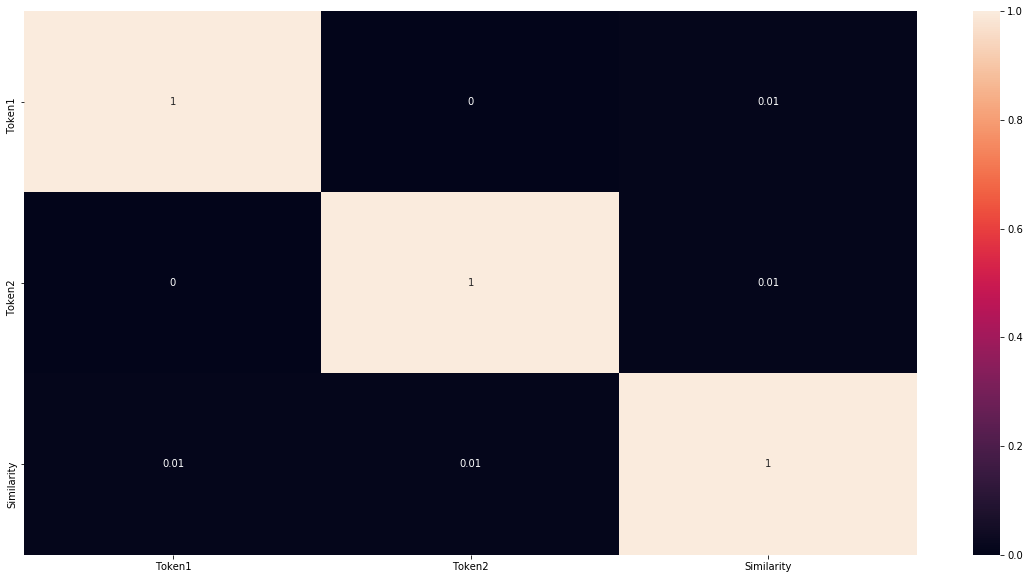

In [23]:
# Plotting with Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_viz.corr(),annot=True)
plt.show()

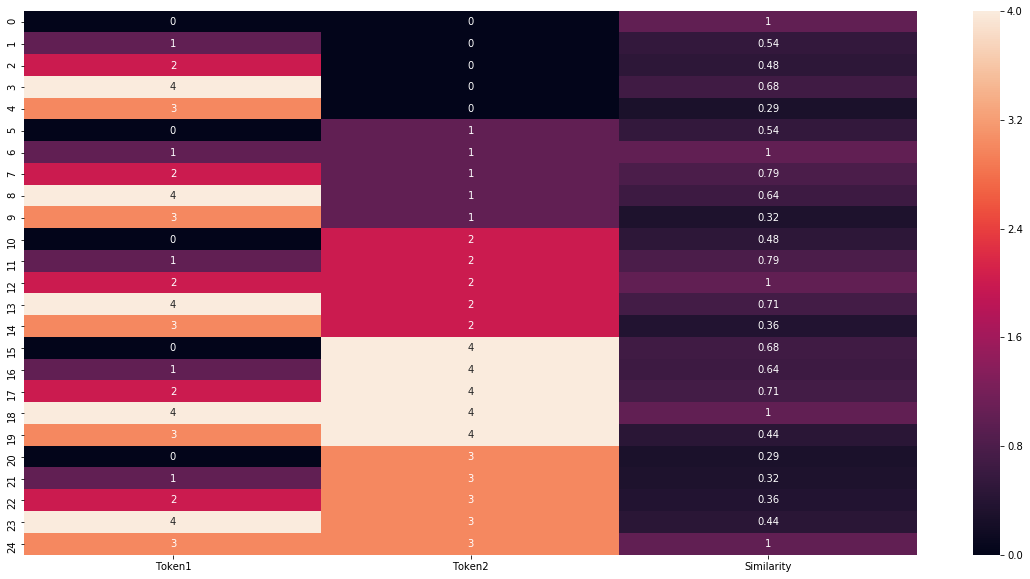

In [24]:
# Plotting without correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_viz,annot=True)
plt.show()

### Word Analysis

In [25]:
myphrase = "The man reading the news is very tall.,For us the news is a concern"

In [26]:
myphrase

'The man reading the news is very tall.,For us the news is a concern'

In [27]:
doc_phrase1 = nlp("The man reading the news is very tall.")

In [28]:
for word in doc_phrase1.noun_chunks:
    print(word.text)

The man
the news


**Noun Chunks=noun + word describing the noun**

In [29]:
# Root Text
for word in doc_phrase1.noun_chunks:
    print(word.text,"Connector:",word.root.text)

The man Connector: man
the news Connector: news


In [30]:
doc_phrase2 = nlp("For us the news is a concern.")

In [31]:
for word in doc_phrase2.noun_chunks:
    print(word.text,"Connector:",word.root.text,"Text of Root Tokens Head: ",word.root.head.text)

us Connector: us Text of Root Tokens Head:  For
the news Connector: news Text of Root Tokens Head:  is
a concern Connector: concern Text of Root Tokens Head:  is


# Text Similarity With ML

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

In [33]:
documents = ['wolf','dog','cat','bird','fish']

In [35]:
# steps are 1)to fit i.e learn vocan
# 2) to transform i.e convert into document term matrix
# 3) convert to dense matrix
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(documents).todense()

In [36]:
print(vectorizer.vocabulary_)

{'wolf': 4, 'dog': 2, 'cat': 1, 'bird': 0, 'fish': 3}


In [37]:
for word in features:
    print(euclidean_distances(features[0]),word)

[[0.]] [[0 0 0 0 1]]
[[0.]] [[0 0 1 0 0]]
[[0.]] [[0 1 0 0 0]]
[[0.]] [[1 0 0 0 0]]
[[0.]] [[0 0 0 1 0]]
